# Circuit Quantum Electrodynamics

## Contents

1. [Introduction](#intro)
2. [The Schrieffer-Wolff Transformation](#tswt)
3. [Block-diagonalization of the Jaynes-Cummings Hamiltonian](#bdotjch)
4. [Full Transmon](#full-transmon)
5. [Qubit Drive with cQED](#qdwcqed)
6. [The Cross Resonance Entangling Gate](#tcreg)

## 1. Introduction <a id='intro'></a>

By analogy with Cavity Quantum Electrodynamics (CQED), circuit QED (cQED) exploits the fact that a simple model can be used to both describe the interaction of an atom with an optical cavity and a qubit with a microwave resonator. This model includes the number of photons in the cavity/resonator, the state of the atom/qubit, and the electric dipole interaction between the atom/qubit and cavity/resonator. As we saw in the last section, transmons are actually multi-level systems, but restricting ourselves to the ground $|0\rangle = |g\rangle$ and first excited $|1\rangle = |e\rangle$ states is possible because of the anharmonicity of the transmon. Therefore we can describe the transmon as a qubit described by the Pauli spin matrices
$$
\sigma^x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \qquad
\sigma^y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \qquad
\sigma^z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \qquad
$$
that generate rotations the respective axes around the Bloch sphere. In that case, the simplest model to describe this interaction is the Jaynes-Cummings Hamiltonian in the rotating wave approximation,
$$
H_{\rm JC}^{\rm (RWA)}/\hbar = \omega_r a^\dagger a + \frac{1}{2} \omega_q \sigma_z + g(a^\dagger \sigma^- + a \sigma^+).
$$
where $\omega_r$ and $\omega_q$ are the frequencies of the resonator and "qubit", respectively, $a$ ($a^\dagger$) is the resonator photon annihilation (creation) operator, and $g$ is the electric dipole coupling (half the vacuum Rabi splitting). Note that we are now omitting the hats from the operators. Here, the first term corresponds to the number of photons in the resonator, the second term corresponds to the state of the qubit, and the third is the electric dipole interaction, where $\sigma^\pm = (1/2)(\sigma^x \mp i\sigma^y)$ is the qubit raising/lowering operator. (Note that the signs are inverted from those of *spin* raising/lowering operators, as discussed in the previous chapter).

This Hamiltonian can be solved exactly, and the solutions are hybrid qubit/resonator states where an excitation (either a photon in the resonator or excited state of the qubit) swaps between the two at a rate $g$ when they are on-resonance ($\omega_r = \omega_q$). For example, the $a^\dagger \sigma^-$ in the third term creates a photon in the resonator and lowers the qubit from $|1\rangle$ to $|0\rangle$, while the $a\sigma^+$ term destroys a photon in the resonators and excites the qubit from $|0\rangle$ to $|1\rangle$. While interesting, for our quantum computer we want to deal with qubits, and not these hybrid states. This means we want to move to a regimes where the resonator acts as a perturbation to the qubit (and vice-versa), so that their properties merely become "dressed" by the presence of the other. Using a type of perturbation theory, called the Schrieffer-Wolff (S-W) transformation, we can calculate the properties of the qubit and resonator in the regime we wish to operate. Here it should be noted that treating the transmon as a qubit is illustrative for pedagogical reasons, but the same techniques apply when you consider all the levels of the transmon. The higher levels of the transmon have profound effects and must be considered when designing and simulating them. 

## 2. The Schrieffer-Wolff Transformation <a id='tswt'></a>

<details>
    <summary>Schrödinger's Equation (Click here to expand)</summary>
Problems in quantum mechanics are often that of diagonalizing a Hamiltonian eigenvalue equation
$$
H\psi_m = E_m \psi_m \qquad {\rm for} \quad 1 \le m \le n
$$
where the $\psi_m$ are the eigenstates with eigenvalue $E_m$. This consists of finding a unitary matrix $U$, such that $H' = U H U^\dagger$ is diagonal. Then the eigenvalue equation
$$
\hat{H} \psi_m = E_m \psi_m \Longrightarrow U H U^\dagger U \psi_m = E_m U \psi_m \Longrightarrow H' \psi_m' = E_m \psi_m'
$$
where $\psi_m' = U\psi_m$ are the transformed eigenstates and
$$
H' = \begin{pmatrix}
E_1 & 0 & \cdots & 0 \\
0 & E_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & 0 \\
0 & 0 & \cdots & E_n \end{pmatrix}
$$
is the diagonalized Hamiltonian.
</details>

With the S-W transformation, instead of diagonalizing the Hamiltonian, we seek to *block-diagonalize* it. Suppose we have a Hamiltonian that can be broken up into a diagonal part and perturbation
$$
H \quad = \quad \underbrace{\begin{pmatrix}
\Box &  &  &  &  &  &  \\
 & \Box &  &  &  &  &  \\
 &  & \Box &  &  &  &  \\
 &  &  & \Box &  &  &  \\
 &  &  &  & \Box &  &  \\
 &  &  &  &  & \Box &  \\
 &  &  &  &  &  & \Box \end{pmatrix}}_\text{diagonal} \quad + \quad 
\underbrace{\begin{pmatrix}
\times & \times & \times & \times & \cdot & \cdot & \cdot \\
\times & \times & \times & \times & \cdot & \cdot & \cdot \\
\times & \times & \times & \times & \cdot & \cdot & \cdot \\
\times & \times & \times & \times & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot & \times & \times & \times \\
\cdot & \cdot & \cdot & \cdot & \times & \times & \times \\
\cdot & \cdot & \cdot & \cdot & \times & \times & \times \end{pmatrix}}_\text{perturbation}
$$
and then write the perturbation as $H_1 + H_2$ so that $H = H_0 + H_1 + H_2$, with $H_0$ diagonal, $H_1$ block-diagonal, and $H_2$ non-block diagonal, and we have
$$
H \quad = \quad \underbrace{\begin{pmatrix}
\Box &  &  &  &  &  &  \\
 & \Box &  &  &  &  &  \\
 &  & \Box &  &  &  &  \\
 &  &  & \Box &  &  &  \\
 &  &  &  & \Box &  &  \\
 &  &  &  &  & \Box &  \\
 &  &  &  &  &  & \Box \end{pmatrix}}_\text{diagonal}
\quad + \quad
\underbrace{\begin{pmatrix}
\times & \times & \times & \times &  &  &  \\
\times & \times & \times & \times &  &  &  \\
\times & \times & \times & \times &  &  &  \\
\times & \times & \times & \times &  &  &  \\
 &  &  &  & \times & \times & \times \\
 &  &  &  & \times & \times & \times \\
 &  &  &  & \times & \times & \times \end{pmatrix}}_\text{block diagonal} 
\quad + \quad
\underbrace{\begin{pmatrix}
 &  &  &  & \cdot & \cdot & \cdot \\
 &  &  &  & \cdot & \cdot & \cdot \\
 &  &  &  & \cdot & \cdot & \cdot \\
 &  &  &  & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot &  &  &  \\
\cdot & \cdot & \cdot & \cdot &  &  &  \\
\cdot & \cdot & \cdot & \cdot &  &  &  \end{pmatrix}}_\text{block off-diagonal}
$$

Block-diagonalizing $H$ consists of finding an operator $S$ such that

$$
H_{\rm eff} = e^{iS} H e^{-iS} = \sum_{m=0}^\infty \frac{1}{m!} [H, S]^{(m)} = \sum_{m=0}^\infty \lambda^m H^{(m)},
$$

where $H^{(m)}$ are successive approximations to $H$ (with $H^{(0)} = H_0$) and the generalized commutator is defined recursively as 

$$
[H,S]^{(m)} = [[H,S]^{(m-1)},S] \qquad {\rm with} \qquad [H,S]^{(0)} = H. 
$$

Here we treat $S$ as a Taylor series with

$$ S = \sum_{m=1}^\infty \lambda^m S^{(m)} $$

to keep track of the order $\lambda$. Then expanding the effective Hamiltonian as a perturbation of $H_1+H_2$ to second order in $\lambda$,

$$
H_{\rm eff} = H_0 + \lambda (H_1+H_2) + \left[H_0 + \lambda(H_1+H_2), \lambda S^{(1)}\right] 
  + \frac{1}{2} \left[ \left[ H_0 + \lambda(H_1+H_2), \lambda S^{(1)}\right], \lambda S^{(1)}\right]
  + \left[H_0 + \lambda(H_1+H_2), \lambda^2 S^{(2)}\right] + \ldots \\
  \approx H_0 + \lambda \left( H_1 + H_2 + \left[H_0, S^{(1)}\right] \right) 
  + \lambda^2 \left( \left[H_1+H_2, S^{(1)}\right] + \frac{1}{2} \left[ \left[H_0, S^{(1)}\right], S^{(1)}\right] + \left[H_0, S^{(2)}\right]\right)
$$

Now we know $S$ must be block off-diagonal and anti-hermitian to force the block off-diagonal elements of $H_{\rm eff}$ to vanish, we must have that

$$
H_{\rm eff}^{\rm off-diag} = \sum_{m=0}^\infty \frac{1}{(2m+1)!} [\underbrace{H_0 + H_1}_\text{block diag}, S]^{(2m+1)} + \sum_{m=0}^\infty \frac{1}{(2m)!} [\underbrace{H_2}_\text{block off-diag}, S]^{(2m)} \equiv 0,
$$

noting that all the terms in the first series are block off-diagonal and all of those in the second series are block diagonal. This is because the commutator of a block diagonal and block off-diagonal matrix is block off-diagonal and the commutator of two block off-diagonal matrices is block diagonal. Expanding this to the generalized commutator, we can see that $[H^0 + H^1, S]^{(n)}$ with odd $n$ must always be block off-diagonal as well as $[H^2, S]^{(n)}$ with even $n$. Now expanding the off-diagonal part of the Hamiltonian to second order yields

$$
H_{\rm eff}^{\rm off-diag} = \left[ H_0 + \lambda H_1, \lambda S^{(1)} \right]+\lambda H_2 + \left[H_0 + \lambda H_1, \lambda^2 S^{(2)}\right]
  + \frac{1}{3!} \left[ H_0+\lambda H_1, \lambda S^{(1)}\right]^{(3)} + \frac{1}{2!} \left[ \lambda H_2, \lambda S^{(1)}\right]^{(2)} \\
  = \lambda \left( \left[ H_0, S^{(1)} \right] + H_2 \right) + \lambda^2 \left( \left[H_1, S^{(1)} \right] + \left[H_0, S^{(2)}\right]\right) + \ldots.
$$
Since each order of $\lambda$ must be identically zero, the following equations determine $S^{(m)}$,
$$
[H_0, S^{(1)}] = -H_2 \qquad
[H_0, S^{(2)}] = -[H_1, S^{(1)}] \qquad
[H_0, S^{(3)}] = -[H_1, S^{(2)}] - \frac{1}{3} [[H_2, S^{(1)}], S^{(1)}],
$$
where our ansatz that satisfied these equations is guaranteed unique by Winkler's work. Then our effective Hamiltonian becomes

$$
H_{\rm eff} = H_0+H_1+[H_2,S^{(1)}] + \frac{1}{2} [[H_0, S^{(1)}], S^{(1)}] + \ldots = H_0+H_1+\frac{1}{2}[H_2,S^{(1)}] + \ldots
$$

where the effective Hamiltonian is calculated here to second order and we have taken $\lambda \to 1$.

## 3. Block-diagonalization of the Jaynes-Cummings Hamiltonian <a id='bdotjch'></a>

Using the S-W transformation consists of two problems: 1) finding the correct ansatz, and 2) performing the calculations. In most examples, an ansatz of similar form (i.e. anti-hermitian) to the off-diagonal parts is made and confirmed *a postori*. Recently, the manuscript [A Systematic Method for Schrieffer-Wolff Transformation and Its Generalizations](http://www.arxiv.org/abs/2004.06534) has appeared on the arXiv attesting to systematically providing the ansatz and applying it to numerous systems (including the Jaynes-Cumming Hamiltonian below).

As such, the *generator* $\eta$ is calculated as $\eta = [H_0, H_2]$. In keeping the scalar coefficients of $\eta$ undetermined, then $S^{(1)}$ can be calculated as the specific $\eta$ that satisfies $[H_0, \eta]=H_2$. Note the hermiticity of $H_0$ and $H_2$ guarantee the anti-hermiticity of $\eta$ and thus $S^{(1)}$. 

For ease of tedious calculations, we will use the Python package [`sympy`](http://www.sympy.org) for symbolic mathematics.

In [1]:
# import SymPy and define symbols
import sympy as sp
sp.init_printing(use_unicode=True)
wr = sp.Symbol('\omega_r') # resonator frequency
wq = sp.Symbol('\omega_q') # qubit frequency
g = sp.Symbol('g', real=True) # vacuum Rabi coupling
Delta = sp.Symbol('Delta', real=True) # wr - wq; defined later

In [2]:
# import operator relations and define them
from sympy.physics.quantum.boson import BosonOp
a = BosonOp('a') # resonator photon annihilation operator
from sympy.physics.quantum import pauli, Dagger, Commutator
from sympy.physics.quantum.operatorordering import normal_ordered_form

# Pauli matrices
sx = pauli.SigmaX()
sy = pauli.SigmaY()
sz = pauli.SigmaZ()

# qubit raising and lowering operators, notice the spin and qubit ladder operators are inversed
splus = pauli.SigmaMinus()
sminus = pauli.SigmaPlus()

In [3]:
# define J-C Hamiltonian in terms of diagonal and non-block diagonal terms
H0 = wr*Dagger(a)*a - (1/2)*wq*sz; 
H2 = g*(Dagger(a)*sminus + a*splus); 
HJC = H0 + H2; HJC # print

In [4]:
# using the above method for finding the ansatz
eta = Commutator(H0, H2); eta

As a note about `sympy`, we will need to used the methods `doit()`, `expand`, `normal_ordered_form`, and `qsimplify_pauli` to proceed with actually taking the commutator, expanding it into terms, normal ordering the bosonic modes (creation before annihilation), and simplify the Pauli algebra. Trying this with $\eta$ yields

In [5]:
pauli.qsimplify_pauli(normal_ordered_form(eta.doit().expand()))

Now take $A$ and $B$ as the coefficients of $a^\dagger \sigma_-$ and $a\sigma_+$, respectively. Then the commutator

In [6]:
A = sp.Symbol('A')
B = sp.Symbol('B')
eta = A * Dagger(a) * sminus - B * a * splus;
pauli.qsimplify_pauli(normal_ordered_form(Commutator(H0, eta).doit().expand()))

This expression should be equal to $H_2$

In [7]:
H2

which implies $A = B = g/\Delta$ where $\Delta = \omega_r - \omega_q$ is the frequency detuning between the resonator and qubit. Therefore our $S^{(1)}$ is determined to be

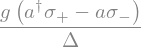

In [8]:
S1 = eta.subs(A, g/Delta)
S1 = S1.subs(B, g/Delta); S1.factor()

Then we can calculate the effective second order correction to $H_0$

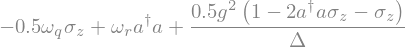

In [9]:
Heff = H0 + 0.5*pauli.qsimplify_pauli(normal_ordered_form(Commutator(H2, S1).doit().expand())).simplify(); Heff

This is typically written as
$$
H_{\rm eff} = \frac{g^2}{2\Delta} \left(\omega_r + \frac{g^2}{\Delta}\sigma_z\right)a^\dagger a  - \frac{1}{2}\left(\omega_q -\frac{g^2}{\Delta}\right) \sigma_z
$$
which shows a state-dependent shift by $\chi \equiv g^2/\Delta$ of the resonator frequency called the *ac Stark shift* and a shift in qubit frequency due to quantum vacuum fluctuations called the *Lamb shift*.

## 4.  Full Transmon <a id='full-transmon'></a>

Because we are using *transmons* instead of *qubits*, we need to be careful to take the higher-order energy terms into effect when designing and simulating devices. The full transmon Hamiltonian coupled to the readout resonators is

$$
H^{\rm tr} = \omega_r a^\dagger a + \sum_j \omega_j |j\rangle\langle j| + g\left(a^\dagger c + ac^\dagger \right),
$$

where now $c = \sum_j \sqrt{j+1}|j\rangle\langle j+1|$ is the transmon lowering operator. Similarly, taking the weakly interacting subsets $A$ as the even-numbered transmon modes and $B$ as the odd-numbered transmon modes. Using the ansatz

$$
S^{(1)} = \sum_j \alpha_j a^\dagger \sqrt{j+1}|j\rangle\langle j+1| - \alpha_j^* a \sqrt{j+1}|j+1\rangle\langle j|,
$$

one may proceed along a messier version of the Jaynes-Cummings Hamiltonian. With some effort one can show the second order effective Hamiltonian is

$$
H^{\rm tr}_{\rm eff} = \left( \omega_r + \sum_j \frac{g^2(\omega_r-\omega+\delta)}{(\omega_r-\omega-\delta j)(\omega_r - \omega - \delta(j-1))} |j\rangle\langle j| \right) a^\dagger a + \sum_j 
\left[
j\omega + \frac{\delta}{2} (j-1)j + \frac{jg^2}{\omega-\omega_r+(j-1)\delta} \right]|j\rangle\langle j|.
$$

## 5. Qubit Drive with cQED <a id='qdwcqed'></a>

Following that of [Blais *et al* (2004)](https://arxiv.org/abs/cond-mat/0402216), we model the drive Hamiltonian as
$$
H^d(t) = \xi(t)\left( a^\dagger e^{-i\omega_d t} + ae^{i\omega_d t}\right).
$$
Following the treatment in the [Ph.D. dissertation of Lev Bishop](https://arxiv.org/abs/1007.3520), the drive acts on the qubit via the Glauber operator
$$
D(\alpha) = e^{\alpha(t) a^\dagger - \alpha^*(t) a}.
$$
Moving to the Jaynes-Cumming Hamiltonian rotating at the drive frequency,
$$
H = \Delta_r a^\dagger a - \frac{1}{2} \Delta_q \sigma^z + g(a^\dagger \sigma^- + a\sigma^+) + \xi(t)(a^\dagger + a)
$$
with $\Delta_r = \omega_r - \omega_d$ and $\Delta_q = \omega_q - \omega_d$. Applying Hadamard's Lemma to nested commutators,
$$
e^{A}BA^{-A} = B + [A,B] + \frac{1}{2!} [A,[A,B]] + \frac{1}{3!}[A,[A,[A,B]]] + \ldots
$$
we see that
$$
D^\dagger a^{(\dagger)} D = \exp\{-\alpha(t) a^\dagger + \alpha^*(t) a\} a^{(\dagger)}\exp\{\alpha(t) a^\dagger - \alpha^*(t) a\} 
= a^{(\dagger)} + \left[-\alpha(t) a^\dagger + \alpha^*(t) a, a^{(\dagger)}\right] + \frac{1}{2!}\left[-\alpha(t) a^\dagger + \alpha^*(t) a, \left[-\alpha(t) a^\dagger + \alpha^*(t) a, a^{(\dagger)}\right]\right] + \ldots
 = a^{(\dagger)} + \alpha^{(*)}
$$
and

$$
D^\dagger a^\dagger a D = a^\dagger a + \left[-\alpha(t) a^\dagger + \alpha^*(t) a, a^\dagger a\right] + \frac{1}{2!}\left[-\alpha(t) a^\dagger + \alpha^*(t) a, \left[-\alpha(t) a^\dagger + \alpha^*(t) a, a^\dagger a\right]\right] + \ldots
= a^\dagger a + \alpha(t)a^\dagger + \alpha^*(t)a + |\alpha(t)|^2
$$

So that we can transform the Hamiltonian

$$
\tilde{H} = D^\dagger H D - iD^\dagger \dot{D} = \Delta_r\left(a^\dagger a + \alpha(t)a^\dagger + \alpha^*(t)a + |\alpha(t)|^2\right) - \frac{1}{2} \Delta_q \sigma^z \\ + g\left((a^\dagger + \alpha^*(t))\sigma^- + (a+\alpha(t))\sigma^+\right) + \xi(t)\left(a^\dagger + \alpha^*(t) + a + \alpha(t) \right) - i\left(\dot{\alpha}(t) a^\dagger - \dot{\alpha}^*(t) a\right) \\
= \Delta_r a^\dagger a - \frac{1}{2}\Delta_q \sigma^z + g\left((a^\dagger + \alpha^*(t))\sigma^- + (a+\alpha(t))\sigma^+\right) \\
+\xi(t)\left(a^\dagger  + a \right) + \Delta_r\left(\alpha(t)a^\dagger + \alpha^*(t)a\right)- i\left(\dot{\alpha}(t) a^\dagger - \dot{\alpha}^*(t) a\right)
$$

where the non-operator terms have been dropped. The last line can be set to zero if we choose

$$
-i\dot{\alpha}(t) + \Delta_r \alpha(t) + \xi(t) = 0,
$$

and finally introducing the Rabi frequency $\Omega(t) = 2g\alpha(t)$, we arrive at

$$
\tilde{H} = \Delta_r a^\dagger a - \frac{1}{2}\Delta_q \sigma^z + g\left(a^\dagger\sigma^- + a\sigma^+\right)
+\frac{1}{2} \left( \Omega^*(t)\sigma^- + \Omega(t) \sigma^+\right).
$$

Since the drive part of the Hamiltonian is block off-diagonal, we can perform a Schrieffer-Wolff transformation on it (for a real drive $\Omega^*(t) = \Omega(t)$) and add it to the effective Hamiltonian,

$$
[\tilde{H}^d, S^{(1)}] = -\frac{\Omega(t)}{2} \left[ (\sigma^- + \sigma^+),\frac{g}{\Delta}\left( a^\dagger \sigma^- - a\sigma^+\right)\right] = \frac{g\Omega(t)}{2\Delta}(a + a^\dagger)\sigma^z
$$

so the effective Hamiltonian becomes

$$
\tilde{H}_{\rm eff} = \left( \Delta_r + \frac{g^2}{\Delta}\sigma^z\right) a^\dagger a - \frac{1}{2}\left(\Delta_q - \frac{g^2}{\Delta}\right) \sigma^z + \frac{\Omega(t)}{2}\sigma^x
+ \frac{g\Omega(t)}{4\Delta}(a + a^\dagger)\sigma^z.
$$

Note here that to eliminate the $z$ rotations, one should drive at the Lamb-shifted qubit frequency. The additional $\sigma^z$ term is small because $\Delta \gg g$ in the dispersive regime.

For clarity one can recall that 
$$\omega^{\pm} = \frac{1}{2} (\sigma^x \mp i\sigma^y)$$
is the definition of the qubit raising/lowering operator. If one chooses $\Omega$ to be real, then $\Omega^* = \Omega$ in the transformed Hamiltonian above, then we are left with only the $\sigma^x$ term, because $$\sigma^x = \sigma^+ + \sigma^-$$. If instead, we chose $\Omega$ to be purely imaginary , then $\Omega^* = -\Omega$, and we are left with only $$\sigma^y = \sigma^+ - \sigma^-$$. This is because the 90$^{\circ}$ rotation in the complex plane (taking real $\Omega$ to imaginary $\Omega$) corresponds to a 90$^{\circ}$ rotation of axis in the $xy$ plane (taking the $\hat{x}$-axis to the $\hat{y}$-axis) of the Bloch sphere.

## 6. The Cross Resonance Entangling Gate <a id='tcreg'></a>

Driving qubit one at the frequency of qubit two can be written as

$$
H^d(t) = \frac{\Omega(t)}{2} \left( \sigma_1^+ e^{-i\tilde{\omega}_2 t} + \sigma_1^- e^{i\tilde{\omega}_2 t}\right).
$$

Now, we need to apply Schrieffer-Wolff to the drive term to get the effective Hamiltonian, and then do the RWA at frequency $\tilde{\omega}_2$.

$$
[\tilde{H}^d, S^{(1)}] = -\frac{J\Omega(t)}{2\Delta_{12}} \left[ \sigma_1^+ e^{-i\tilde{\omega}_2 t} + \sigma_1^- e^{i\tilde{\omega}_2 t}, \sigma_1^+ \sigma_2^- - \sigma_2^+ \sigma_1^-\right] 
=-\frac{J\Omega(t)}{2\Delta_{12}} \left(\sigma_1^z \sigma_2^+ e^{-i\tilde{\omega}_2 t}
+\sigma_1^z \sigma_2^- e^{i\tilde{\omega}_2 t} \right)
$$

Transforming back the rotating frame at $\omega_2$, we get the effective qubit cross resonance Hamiltonian

$$
\tilde{H}_{\rm eff}^{\rm CR} = - \frac{\tilde{\omega}_1-\tilde{\omega}_2}{2}\sigma_1^z 
+ \frac{\Omega(t)}{2} \left(\sigma_2^x - \frac{J}{2\Delta_{12}} \sigma_1^z \sigma_2^x \right).
$$

The first two terms involve the $ZI$ interaction due to a Stark shift on qubit 1 and an unconditional $IX$ rotation on qubit 2, but the final term represents the $ZX$-interaction that produces entanglement. By putting qubit 1 into an equal superposition of $|0\rangle$ and $|1\rangle$ and applying the cross resonance gate for a duration corresponding to a $\pi/2$ rotation around the $x$-axis, a maximally entangled state is produced. Using Qiskit to characterize the two-qubit cross resonance Hamiltonian for transmons can be done with [this tutorial](https://github.com/Qiskit/qiskit-tutorials/blob/9405254b38312771f8d5c2dd6f451cec35307995/tutorials/noise/1_hamiltonian_and_gate_characterization.ipynb). Further reading on the cross resonance gate is found [here](https://arxiv.org/abs/1106.0553) and [here](https://arxiv.org/abs/1603.04821).
